## Track features study

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy import signal
import h5py
import glob
import itertools

### Reading files

In [2]:
## Reading files
folder = '../data/Runs001'
# all h5 files will be showed
fullFiles  = glob.glob(folder + '/*.h5')
fullFiles

['../data/Runs001/first_simulations.h5']

In [3]:
img_num = 70

### Image sample (Real (don't matter on this analisys) and Truth (pixels more than 0))

(1250, 850)

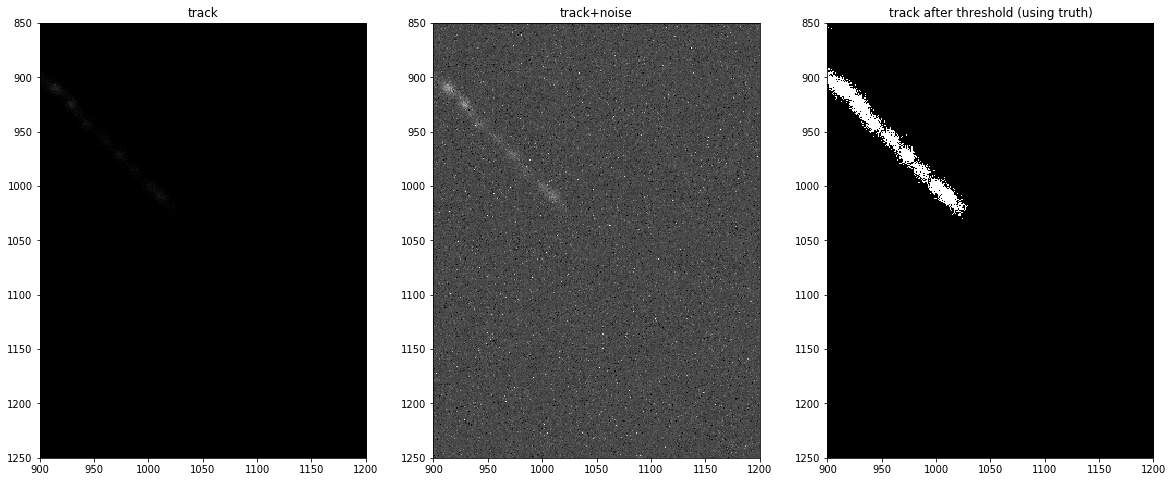

In [4]:
f = h5py.File(fullFiles[0],'r')
fig,ax = plt.subplots(1,3,figsize = (20,8))
im_real = f['x_train'][img_num,:].reshape(2048,2048)
im_truth = f['y_train'][img_num,:].reshape(2048,2048)
im_truth_threshold = im_truth>0
ax[1].imshow(im_real, vmax = 135, vmin = 85, cmap = 'gray')
ax[1].set_xlim([900,1200])
ax[1].set_ylim([1250,850])
ax[0].set_title('track')
ax[0].imshow(im_truth, cmap = 'gray')
ax[0].set_xlim([900,1200])
ax[0].set_ylim([1250,850])
ax[1].set_title('track+noise')
ax[2].imshow(im_truth_threshold, cmap = 'gray')
ax[2].set_title('track after threshold (using truth)')
ax[2].set_xlim([900,1200])
ax[2].set_ylim([1250,850])

### Algorithms to detect trajectory of an object
    
   From Digital Image Processing book, I've found two interesting tools to do that task
        
       -THINNING
       -SKELETONS
   
   The implementations of those techniques could be got from scikit-image and we will try use that in our images   
   
### Importing libraries utils   

In [5]:
from skimage import img_as_float
from skimage import io, color, morphology, filters
from skimage.morphology import disk

(1250, 850)

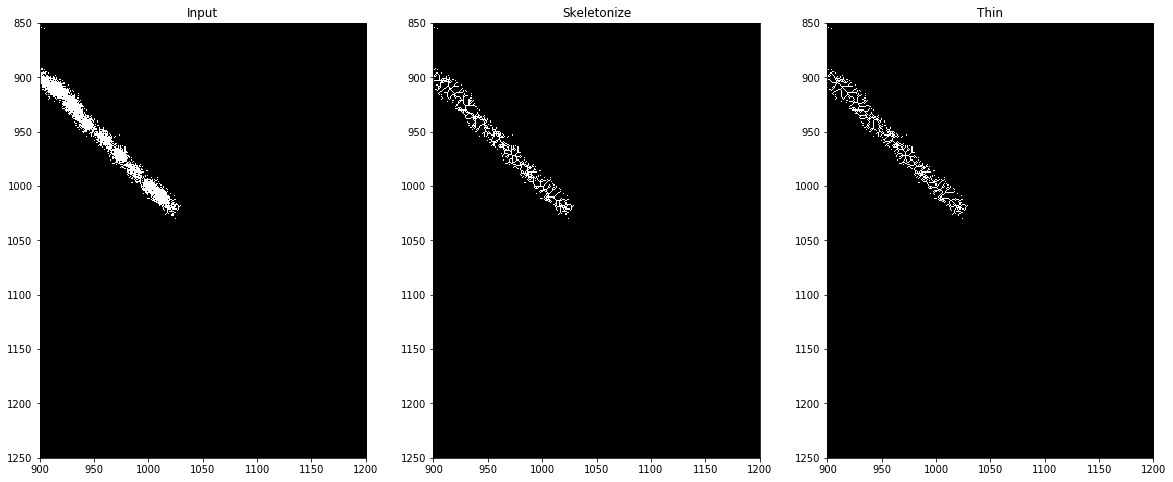

In [6]:
out_skeletonize = morphology.skeletonize(im_truth_threshold)
out_thin = morphology.thin(im_truth_threshold)



f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,8))

ax0.imshow(im_truth_threshold, cmap='gray')
ax0.set_title('Input')
ax0.set_xlim([900,1200])
ax0.set_ylim([1250,850])

ax1.imshow(out_skeletonize, cmap='gray')
ax1.set_title('Skeletonize')
ax1.set_xlim([900,1200])
ax1.set_ylim([1250,850])

ax2.imshow(out_thin, cmap='gray')
ax2.set_title('Thin')
ax2.set_xlim([900,1200])
ax2.set_ylim([1250,850])

## The image has a lot of "holes" let's try to blur the truth in order to solve it 

(1250, 850)

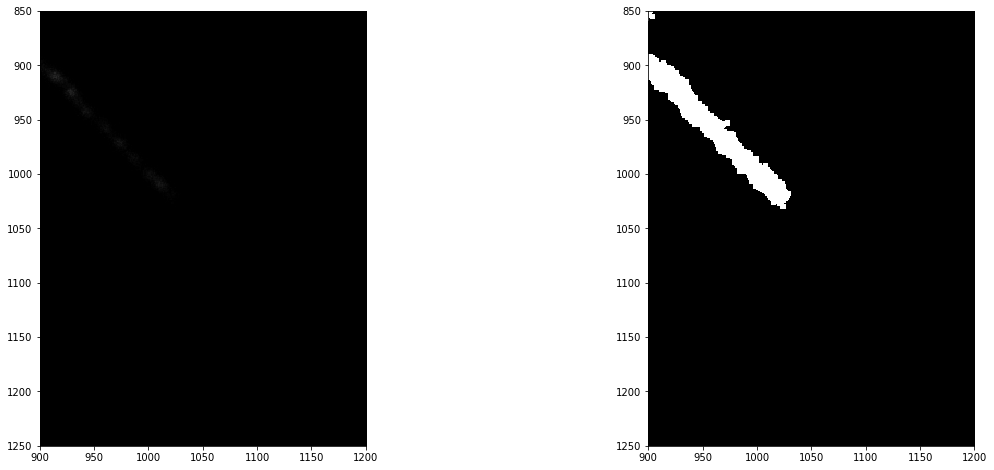

In [7]:
im_filtered = filters.gaussian(im_truth,sigma = 0.5)
im_filtered_threshold = im_filtered>0
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8)) 
ax1.imshow(im_filtered,cmap = 'gray')
ax1.set_xlim([900,1200])
ax1.set_ylim([1250,850])
ax2.imshow(im_filtered_threshold,cmap = 'gray')
ax2.set_xlim([900,1200])
ax2.set_ylim([1250,850])

### Testing results after filtering

(1250, 850)

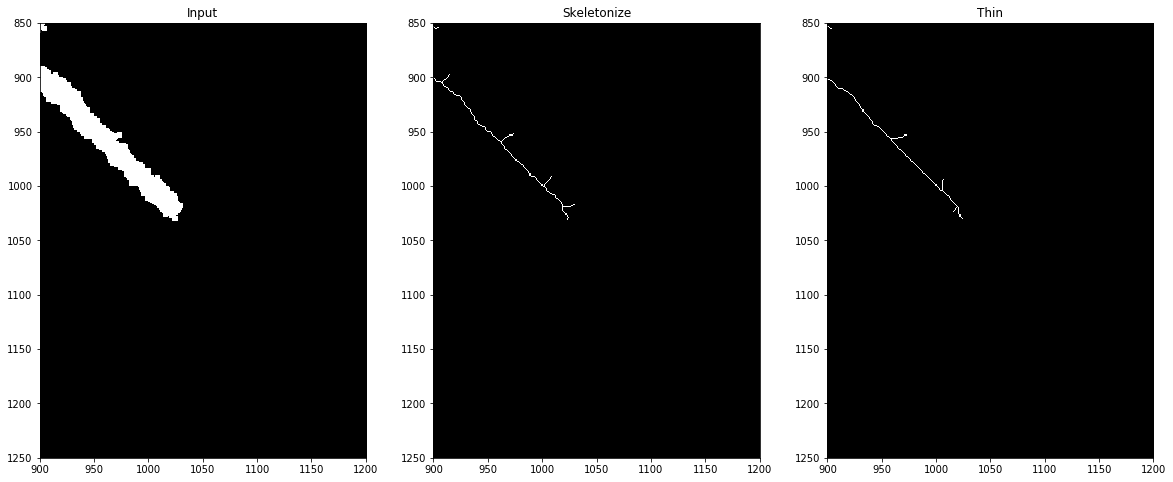

In [8]:
out_skeletonize = morphology.skeletonize(im_filtered_threshold)
out_thin = morphology.thin(im_filtered_threshold)


f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,8))

ax0.imshow(im_filtered_threshold, cmap='gray')
ax0.set_title('Input')
ax0.set_xlim([900,1200])
ax0.set_ylim([1250,850])

ax1.imshow(out_skeletonize, cmap='gray')
ax1.set_title('Skeletonize')
ax1.set_xlim([900,1200])
ax1.set_ylim([1250,850])

ax2.imshow(out_thin, cmap='gray')
ax2.set_title('Thin')
ax2.set_xlim([900,1200])
ax2.set_ylim([1250,850])

#### Because of high variations of intensity on edges we can't get a good results yet. We need to do some operations to improve our trajectory. My first attempt is using opening morphological operation

(1250, 850)

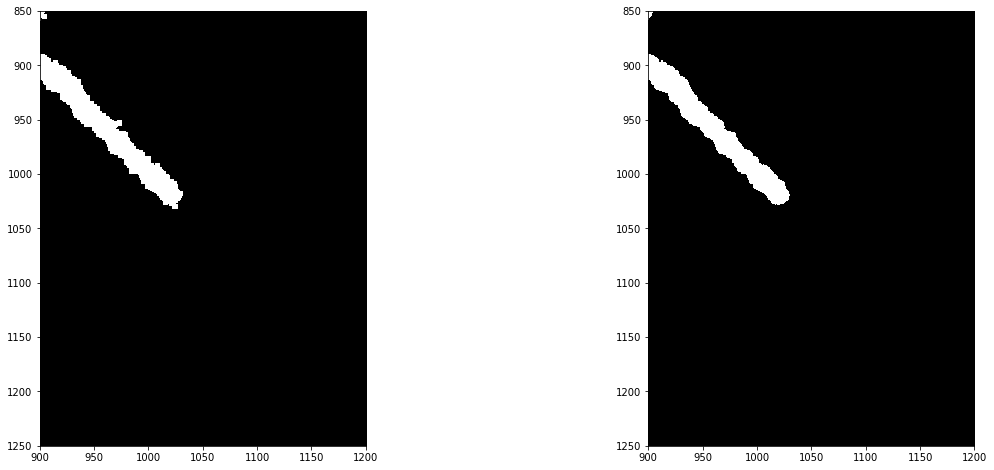

In [9]:
im_binary_opening = morphology.binary_opening(im_filtered_threshold,disk(5))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
ax1.imshow(im_filtered_threshold,cmap = 'gray')
ax1.set_xlim([900,1200])
ax1.set_ylim([1250,850])
ax2.imshow(im_binary_opening,cmap = 'gray')
ax2.set_xlim([900,1200])
ax2.set_ylim([1250,850])

(1250, 850)

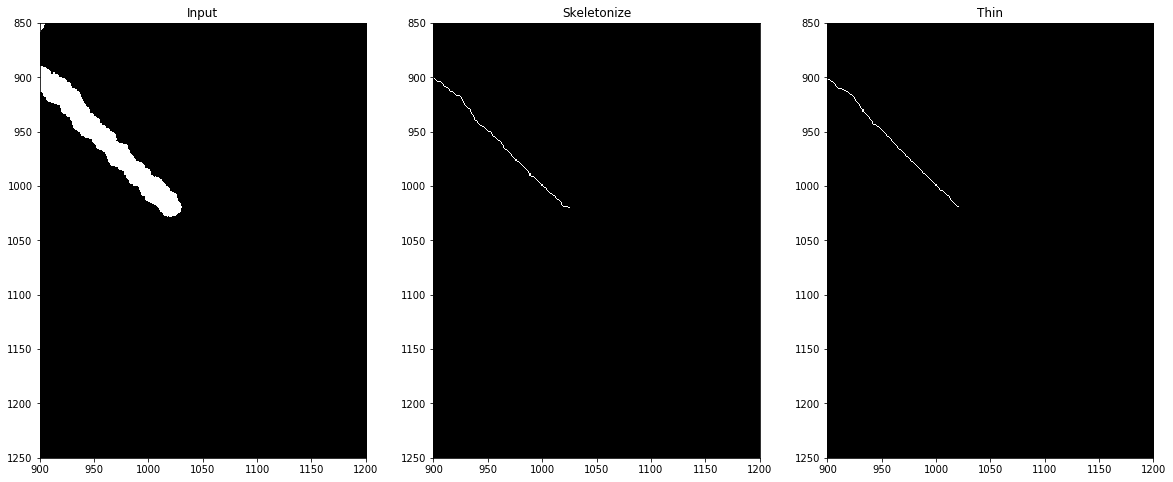

In [10]:
out_skeletonize = morphology.skeletonize(im_binary_opening)
out_thin = morphology.thin(im_binary_opening)


f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20,8))

ax0.imshow(im_binary_opening, cmap='gray')
ax0.set_title('Input')
ax0.set_xlim([900,1200])
ax0.set_ylim([1250,850])

ax1.imshow(out_skeletonize, cmap='gray')
ax1.set_title('Skeletonize')
ax1.set_xlim([900,1200])
ax1.set_ylim([1250,850])

ax2.imshow(out_thin, cmap='gray')
ax2.set_title('Thin')
ax2.set_xlim([900,1200])
ax2.set_ylim([1250,850])

### Visualizing in real image

(1250, 850)

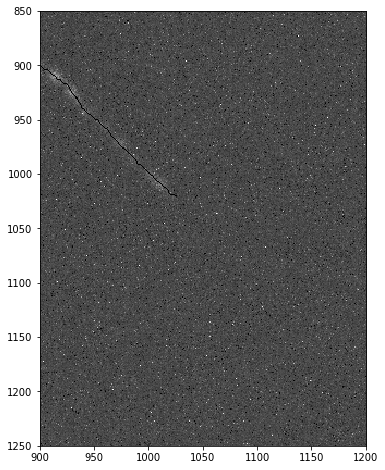

In [11]:
plt.figure(figsize=(20,8))
im_output = np.zeros_like(im_real)
im_output = im_real 
xx,yy = np.where(out_skeletonize == True)
im_output[xx,yy] = 0
plt.imshow(im_output,vmax = 135,vmin = 85,cmap = 'gray')
plt.xlim([900,1200])
plt.ylim([1250,850])
